In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
dataset_path = r"F:\AiMl\Datasets\aiGeneratedImage\test.csv"
df = pd.read_csv(dataset_path)
dataset_path = r'F:\AiMl\Datasets\aiGeneratedImage\real_vs_fake\real-vs-fake'
image_dir = os.path.join(dataset_path, 'test')
real_dir = os.path.join(image_dir, 'real')
fake_dir = os.path.join(image_dir, 'fake')
image_paths = df['path'].apply(lambda x: os.path.join(real_dir if 'real' in x else fake_dir, x.split('/')[-1]))
labels = df['label'].tolist()

In [4]:

random_indices = np.random.choice(len(image_paths), size=int(1 * len(image_paths)), replace=False)
image_paths = image_paths[random_indices]
labels = np.array(labels)[random_indices]

In [5]:
images = []
for img_path in image_paths:
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize the image if needed
    img_array = np.array(img)  # Convert the image to a NumPy array
    images.append(img_array)

In [6]:
images = np.stack(images)

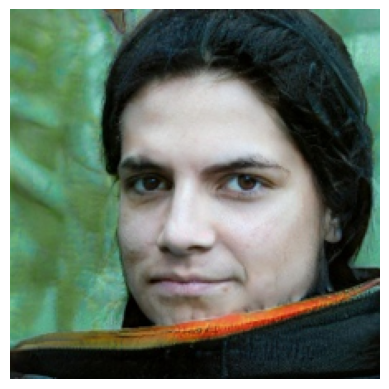

In [7]:
%matplotlib inline
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [8]:
labels[0]

0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [10]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Add your desired number of dense layers
predictions = Dense(2, activation='softmax')(x)  # Binary classification, so 2 classes
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
400/400 [==============================] - 1005s 3s/step - loss: 0.6229 - accuracy: 0.7317 - val_loss: 0.5017 - val_accuracy: 0.7766
Epoch 2/10
400/400 [==============================] - 999s 2s/step - loss: 0.4477 - accuracy: 0.7973 - val_loss: 0.4547 - val_accuracy: 0.7950
Epoch 3/10
400/400 [==============================] - 976s 2s/step - loss: 0.3985 - accuracy: 0.8216 - val_loss: 0.4407 - val_accuracy: 0.7994
Epoch 4/10
400/400 [==============================] - 990s 2s/step - loss: 0.3641 - accuracy: 0.8397 - val_loss: 0.4222 - val_accuracy: 0.8166
Epoch 5/10
400/400 [==============================] - 1006s 3s/step - loss: 0.3255 - accuracy: 0.8598 - val_loss: 0.4324 - val_accuracy: 0.8084
Epoch 6/10
400/400 [==============================] - 1014s 3s/step - loss: 0.2858 - accuracy: 0.8773 - val_loss: 0.4164 - val_accuracy: 0.8184
Epoch 7/10
400/400 [==============================] - 1032s 3s/step - loss: 0.2674 - accuracy: 0.8873 - val_loss: 0.4496 - val_accuracy: 0.

In [16]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
f1score = f1_score(y_true, y_pred)
print("F1 Score:", f1score)

125/125 [==============================] - 345s 3s/step
F1 Score: 0.8084672277480234
